In [1]:
import h5py
import numpy as np
from pesummary.io import read
import matplotlib.pyplot as plt
%matplotlib inline

file_name = '/Users/Oscar/Documents/Research/GW190521/GW190521.h5'
data = read(file_name)
samples_dict = data.samples_dict
posterior_samples = samples_dict['C01:NRSur7dq4']


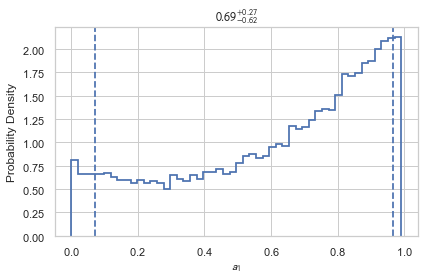

In [37]:
fig = posterior_samples.plot('a_1')

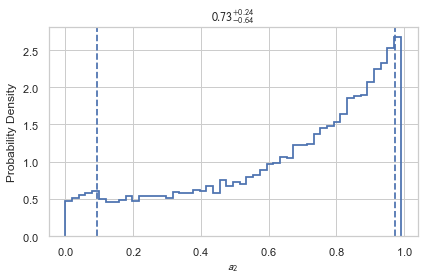

In [38]:
fig = posterior_samples.plot('a_2')

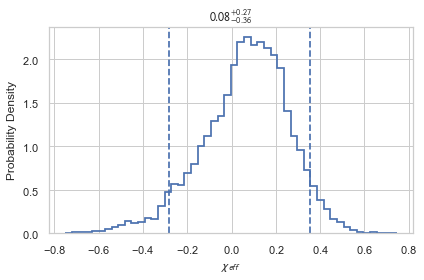

In [39]:
fig = posterior_samples.plot('chi_eff')

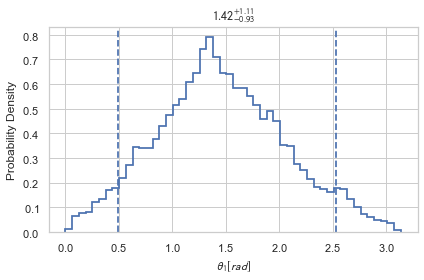

In [41]:
fig = posterior_samples.plot('tilt_1')

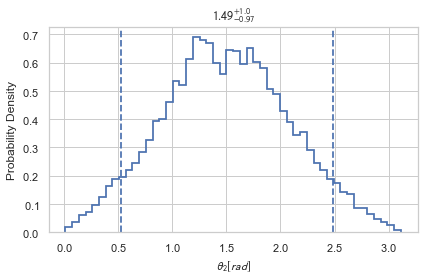

In [42]:
fig = posterior_samples.plot('tilt_2')

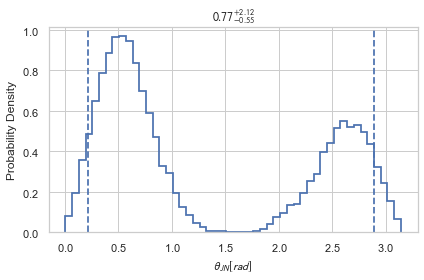

In [43]:
fig = posterior_samples.plot('theta_jn')

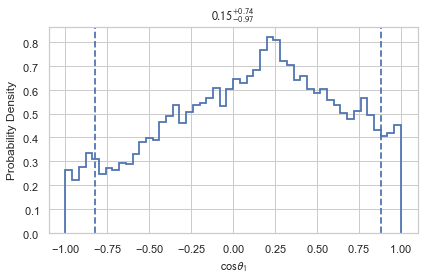

In [44]:
fig = posterior_samples.plot('cos_tilt_1')

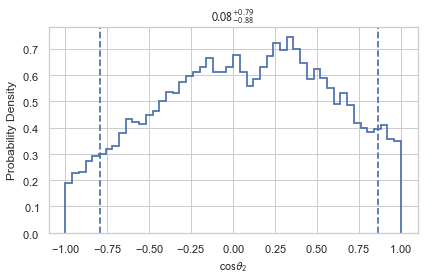

In [45]:
fig = posterior_samples.plot('cos_tilt_2')

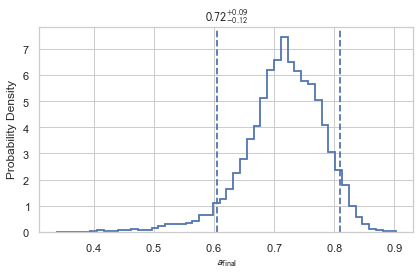

In [15]:
fig = posterior_samples.plot('final_spin')

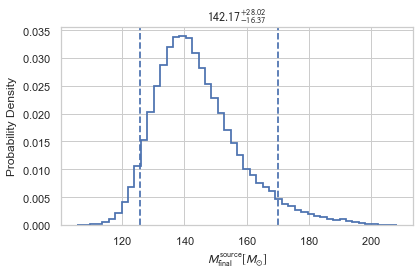

In [42]:
fig = posterior_samples.plot('final_mass_source')

In [91]:
#mass 1
m1 = 85
#mass 2
m2 = 66
#dimensionless spin 1
s1_d = .69
#dimensionless spin 2
s2_d = .73
#dimensionless parallel spin
s_parallel_d = .08
#cos tilt 1
cost1 = 0.15
#cos tilt 2 
cost2 = 0.08
#Final Spin
Arem = 0.72

m = m1 + m2
m_delta = (m1 - m2) / m
delta = m * ((m2 * s2_d) - (m1 * s1_d))
n = (m1 * m2) / m**2

s_par_1 = s1_d * cost1
s_par_2 = s2_d * cost2

#dimensionless delta parallel
delta_parallel_d = m * ( s_par_2 / m2 - s_par_1 / m1 )


# delta = m * ((s2 / m2) - (s1 / m1)) 
# (s1_d = s1 / m1**2)


M0 = 0.951507
K1 = -0.051379
K2a = -0.004804
K2b = -0.054522
K2c = -0.000022
K2d = 1.995246
K3a = 0.007064
K3b = -0.017599
K3c = -0.119175
K3d = 0.025000
K4a = -0.068981
K4b = -0.011383
K4c = -0.002284
K4d = -0.165658
K4e = 0.019403
K4f = 2.980990
K4g = 0.020250
K4h = -0.004091
K4i = 0.078441

In [52]:
#CHECKS IN Chi Eff Math

xf = (m1 * s_par_1 + m2 * s_par_2 ) / m
print('Expected: 0.08. Found:{:0.2f}'.format(xf))

Expected: 0.08. Found:0.08


In [53]:
# TABLE I. Dimensionless parameters characterizing the isco and the transition regime of inspiral.

#https://arxiv.org/pdf/gr-qc/0003032.pdf

# Arem     rtISCO

# -0.99  |   8.972 
# -0.9   |   8.717 
# -0.5   |   7.555
# 0      |   6.000 
# 0.2    |   5.329 
# 0.5    |   4.233
# 0.8    |   2.907
# 0.9    |   2.321
# 0.99   |   1.454 
# 0.999  |   1.182

from scipy import interpolate

x = [-0.99, -0.9, -0.5, 0, 0.2, 0.5, 0.8, 0.9, 0.99, 0.999]
y = [8.972, 8.717, 7.555, 6, 5.329, 4.233, 2.907, 2.321, 1.454, 1.182]
f = interpolate.interp1d(x, y, fill_value = "extrapolate")
Rt = f(Arem)

#https://arxiv.org/pdf/gr-qc/0003032.pdf

import math

Eisco = (1 - 2/Rt + Arem / (Rt ** 1.5)) / ( math.sqrt(1 - 3/Rt + 2*Arem / (Rt ** 1.5)))

In [90]:
sp = s_parallel_d
d = delta_parallel_d
dm = m_delta

Mrem = m * ((4*n)**2 * (M0+K1*sp+K2a*d*dm+K2b*(sp**2)+K2c*(d**2)+K2d*(dm**2)+K3a*d*sp*dm+K3b*sp*(d**2)+K3c*(sp**3)+K3d*sp*(dm**2)+K4a*d*(sp**2)*dm+K4b*(d**3)*dm+K4c*(d**4)+K4d*(sp**4)+K4e*(d**2)*(sp**2)+K4f*(dm**4)+K4g*d*(dm**3)+K4h*(d**2)*(dm**2)+K4i*(sp**2)*(dm**2)))+((1 + n * (Eisco + 11)) * (dm**6))
print(round(Mrem,2))

143.23


In [93]:
m1 = 55
m2 = 35

s1_d = .1
s2_d = .9
s_parallel_d = .50
cost1 = 0.80
cost2 = 0.2
Arem = 0.2

m = m1 + m2
m_delta = (m1 - m2) / m
delta = m * ((m2 * s2_d) - (m1 * s1_d))
n = (m1 * m2) / m**2
s_par_1 = s1_d * cost1
s_par_2 = s2_d * cost2
delta_parallel_d = m * ( s_par_2 / m2 - s_par_1 / m1 )
Rt = f(Arem)
Eisco = (1 - 2/Rt + Arem / (Rt ** 1.5)) / ( math.sqrt(1 - 3/Rt + 2*Arem / (Rt ** 1.5)))
sp = s_parallel_d
d = delta_parallel_d
dm = m_delta
Mrem = m * ((4*n)**2 * (M0+K1*sp+K2a*d*dm+K2b*(sp**2)+K2c*(d**2)+K2d*(dm**2)+K3a*d*sp*dm+K3b*sp*(d**2)+K3c*(sp**3)+K3d*sp*(dm**2)+K4a*d*(sp**2)*dm+K4b*(d**3)*dm+K4c*(d**4)+K4d*(sp**4)+K4e*(d**2)*(sp**2)+K4f*(dm**4)+K4g*d*(dm**3)+K4h*(d**2)*(dm**2)+K4i*(sp**2)*(dm**2)))+((1 + n * (Eisco + 11)) * (dm**6))
print(round(Mrem,2))



80.72


In [99]:
m1 = 55
m2 = 35

s1_d = .3
s2_d = .2
s_parallel_d = .1
cost1 = 0.1
cost2 = 0.2
Arem = 0.1

m = m1 + m2
m_delta = (m1 - m2) / m
delta = m * ((m2 * s2_d) - (m1 * s1_d))
n = (m1 * m2) / m**2
s_par_1 = s1_d * cost1
s_par_2 = s2_d * cost2
delta_parallel_d = m * ( s_par_2 / m2 - s_par_1 / m1 )
Rt = f(Arem)
Eisco = (1 - 2/Rt + Arem / (Rt ** 1.5)) / ( math.sqrt(1 - 3/Rt + 2*Arem / (Rt ** 1.5)))
sp = s_parallel_d
d = delta_parallel_d
dm = m_delta
Mrem = m * ((4*n)**2 * (M0+K1*sp+K2a*d*dm+K2b*(sp**2)+K2c*(d**2)+K2d*(dm**2)+K3a*d*sp*dm+K3b*sp*(d**2)+K3c*(sp**3)+K3d*sp*(dm**2)+K4a*d*(sp**2)*dm+K4b*(d**3)*dm+K4c*(d**4)+K4d*(sp**4)+K4e*(d**2)*(sp**2)+K4f*(dm**4)+K4g*d*(dm**3)+K4h*(d**2)*(dm**2)+K4i*(sp**2)*(dm**2)))+((1 + n * (Eisco + 11)) * (dm**6))
print(round(Mrem,2))

85.53


In [100]:
m1 = 55
m2 = 35

s1_d = .9
s2_d = .9
s_parallel_d = .1
cost1 = 0.9
cost2 = 0.9
Arem = 0.9

m = m1 + m2
m_delta = (m1 - m2) / m
delta = m * ((m2 * s2_d) - (m1 * s1_d))
n = (m1 * m2) / m**2
s_par_1 = s1_d * cost1
s_par_2 = s2_d * cost2
delta_parallel_d = m * ( s_par_2 / m2 - s_par_1 / m1 )
Rt = f(Arem)
Eisco = (1 - 2/Rt + Arem / (Rt ** 1.5)) / ( math.sqrt(1 - 3/Rt + 2*Arem / (Rt ** 1.5)))
sp = s_parallel_d
d = delta_parallel_d
dm = m_delta
Mrem = m * ((4*n)**2 * (M0+K1*sp+K2a*d*dm+K2b*(sp**2)+K2c*(d**2)+K2d*(dm**2)+K3a*d*sp*dm+K3b*sp*(d**2)+K3c*(sp**3)+K3d*sp*(dm**2)+K4a*d*(sp**2)*dm+K4b*(d**3)*dm+K4c*(d**4)+K4d*(sp**4)+K4e*(d**2)*(sp**2)+K4f*(dm**4)+K4g*d*(dm**3)+K4h*(d**2)*(dm**2)+K4i*(sp**2)*(dm**2)))+((1 + n * (Eisco + 11)) * (dm**6))
print(round(Mrem,2))

85.25


In [102]:
m1 = 55
m2 = 35

s1_d = .9
s2_d = .9
s_parallel_d = .2
cost1 = 0.9
cost2 = 0.9
Arem = 0.9

m = m1 + m2
m_delta = (m1 - m2) / m
delta = m * ((m2 * s2_d) - (m1 * s1_d))
n = (m1 * m2) / m**2
s_par_1 = s1_d * cost1
s_par_2 = s2_d * cost2
delta_parallel_d = m * ( s_par_2 / m2 - s_par_1 / m1 )
Rt = f(Arem)
Eisco = (1 - 2/Rt + Arem / (Rt ** 1.5)) / ( math.sqrt(1 - 3/Rt + 2*Arem / (Rt ** 1.5)))
sp = s_parallel_d
d = delta_parallel_d
dm = m_delta
Mrem = m * ((4*n)**2 * (M0+K1*sp+K2a*d*dm+K2b*(sp**2)+K2c*(d**2)+K2d*(dm**2)+K3a*d*sp*dm+K3b*sp*(d**2)+K3c*(sp**3)+K3d*sp*(dm**2)+K4a*d*(sp**2)*dm+K4b*(d**3)*dm+K4c*(d**4)+K4d*(sp**4)+K4e*(d**2)*(sp**2)+K4f*(dm**4)+K4g*d*(dm**3)+K4h*(d**2)*(dm**2)+K4i*(sp**2)*(dm**2)))+((1 + n * (Eisco + 11)) * (dm**6))
print(round(Mrem,2))

84.55
